# CLIMATE CHANGE TWITTER SENTIMENT ANALYSIS

>**Libraries Required**
>
> - numpy
>
> - pandas
>
> - imblearn
>
> - sklearn (scikit-learn)
>
> - keras
>
> - copy
>
> - re
>
> - nltk
>
> - itertools
>
> - wordcloud
>
> - matplotlib
>
> - seaborn
>
> - warnings

> Dataset Link:
>
> - https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset

> Run Time: 5-8 minutes on Mac Silicon M1 Pro

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Import Tweets Dataset to a pandas Dataframe

In [2]:
df = pd.read_csv('twitter_sentiment_data.csv')
df

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


> **Classes:**
> - 2(News): the tweet links to factual news about climate change (This Class values are removed)
> - 1(Pro): the tweet supports the belief of man-made climate change
> - 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change
> -  -1(Anti): the tweet does not believe in man-made climate change

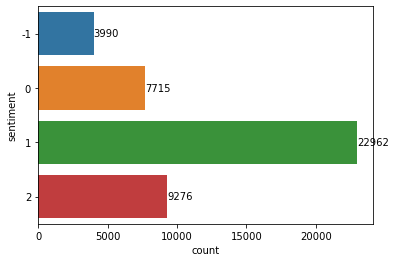

In [3]:
count_plot = sns.countplot(data = df,
                           y = 'sentiment')
count_plot.bar_label(count_plot.containers[0])
plt.show()

From the graph it is clear that the dataset is class imbalanced. Hence we use Random Oversampling Technique to balance the data

In [4]:
from imblearn.over_sampling import *

In [5]:
X = df[['message','tweetid']]
y = df['sentiment']

In [6]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [7]:
df = X_resampled.join(y_resampled)

In [8]:
df

,message,tweetid,sentiment
0,@tiniebeany climate change is an interesting h...,792927353886371840,-1
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,1
2,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,1
3,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,1
4,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,2
...,...,...,...
91843,Medical scientists report on the impact climat...,860444587575328768,2
91844,What's Donald Trump's position on climate chan...,801149421509484544,2
91845,RT @pablorodas: #climatechange #p2 RT Vietnam ...,802124963117285381,2
91846,"New York City sues Shell, ExxonMobil and other...",955541010175614976,2


Visualizing the results

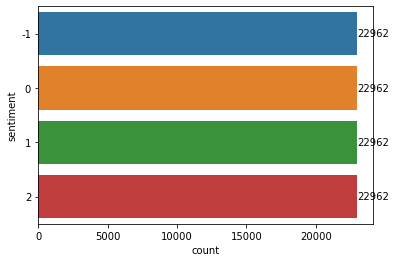

In [9]:
count_plot = sns.countplot(data = df,
                           y = 'sentiment')
count_plot.bar_label(count_plot.containers[0])
plt.show()

>We are not Using the News kind of tweets for Sentiment Analysis.
Hence, removing tweets of class News

In [10]:
df.drop(df[df['sentiment'] == 2].index, inplace = True)
df = df.reset_index()
df = df.drop('index', 1)

In [11]:
#for col in df.columns:
#    print(col)

In [12]:
df.head()

,message,tweetid,sentiment
0,@tiniebeany climate change is an interesting h...,792927353886371840,-1
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,1
2,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,1
3,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,1
4,Unamshow awache kujinga na iko global warming ...,793125429418815489,0


In [13]:
df.sentiment.unique()

array([-1,  1,  0])

In the below line of code, we have duplicated the dataframe to use for Machine Learning Model Training. We have done this because when we experienced variable data type clash after Exploratory Data Analysis

In [14]:
from copy import deepcopy
df2 = deepcopy(df)

In [15]:
labels = df.sentiment.unique()

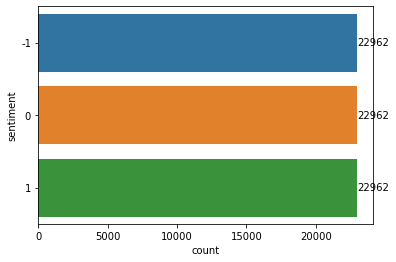

In [16]:
count_plot = sns.countplot(data = df,
                           y = 'sentiment')
count_plot.bar_label(count_plot.containers[0])
plt.show()

We Observe that there are more number of tweets in the class 

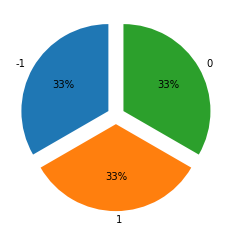

In [17]:
plt.pie(df["sentiment"].value_counts(),
        labels=labels,
        autopct="%1.0f%%",
        startangle=90,
        explode=tuple([0.1] * len(labels)))
plt.show()

In [18]:
count = df.sentiment.value_counts()
count.name = "Count"

percent = df.sentiment.value_counts(normalize=True)
percent.name = "Percentage"

display(pd.concat([count, percent], axis=1))

,Count,Percentage
-1,22962,0.333333
1,22962,0.333333
0,22962,0.333333


In [19]:
df_pro = df[df.sentiment == 1]
df_neutral = df[df.sentiment == 0]
df_anti = df[df.sentiment == -1]
#df_news = df[df.sentiment == 2]

In [20]:
df.message.str.len().describe()

count    68886.000000
mean       120.979836
std         27.960299
min          7.000000
25%        107.000000
50%        133.000000
75%        140.000000
max        623.000000
Name: message, dtype: float64

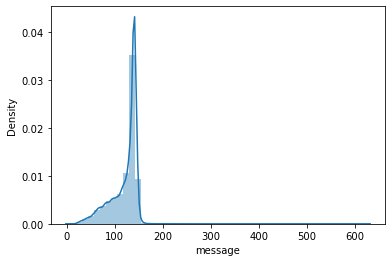

In [21]:
sns.distplot(df.message.str.len())

plt.show()

>**Tweet Stats**
>
>Largest Tweet: 623 character
>
>Shortest Tweet: 7 characters
>
>Average Length is 120 characters

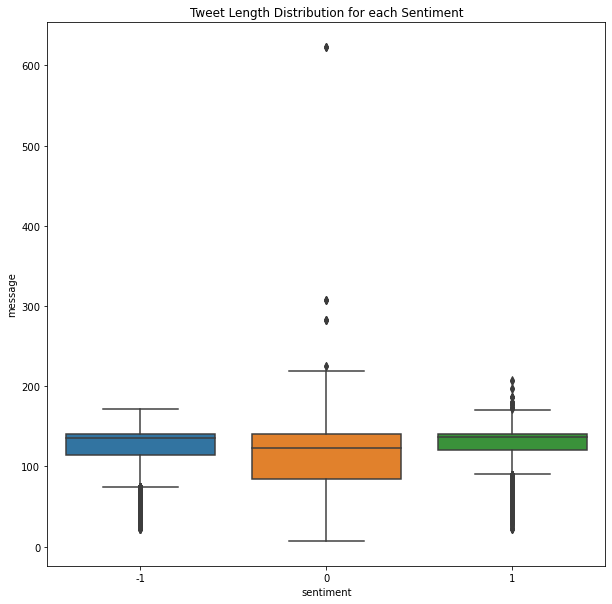

In [22]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="sentiment", y = df["message"].str.len(), data=df)
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()


In [23]:
import re
import nltk
import itertools

Finding few most frequent words for all three classes

In [24]:
top20 = {}


for sentiment, group in df.groupby("sentiment"):
    freq_words = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    freq_words = itertools.chain(*freq_words)
    freq_words = [ht.lower() for ht in freq_words]
    
    frequency = nltk.FreqDist(freq_words)
    
    df_freq_words = pd.DataFrame({
        "freq_words": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top20_htags = df_freq_words.nlargest(20, columns=["counts"])
    
    top20[sentiment] = top20_htags.reset_index(drop=True)

display(pd.concat(top20, axis=1).head(n=10))

-1                     0                       1       
      freq_words counts     freq_words counts       freq_words counts
0           tcot    344        climate    173          climate    541
1           maga    176  climatechange    147    climatechange    384
2        climate    152          trump     56   beforetheflood    265
3  climatechange    148  globalwarming     53     actonclimate    156
4          pjnet    131    debatenight     51   parisagreement    108
5          trump    117          cop21     43  imvotingbecause     93
6  globalwarming    115           maga     31            cop22     86
7             p2     81         auspol     30           auspol     76
8       fakenews     71          cop22     28            cop21     73
9       teaparty     64        science     27    globalwarming     73

Visualize the frequent words and frequency

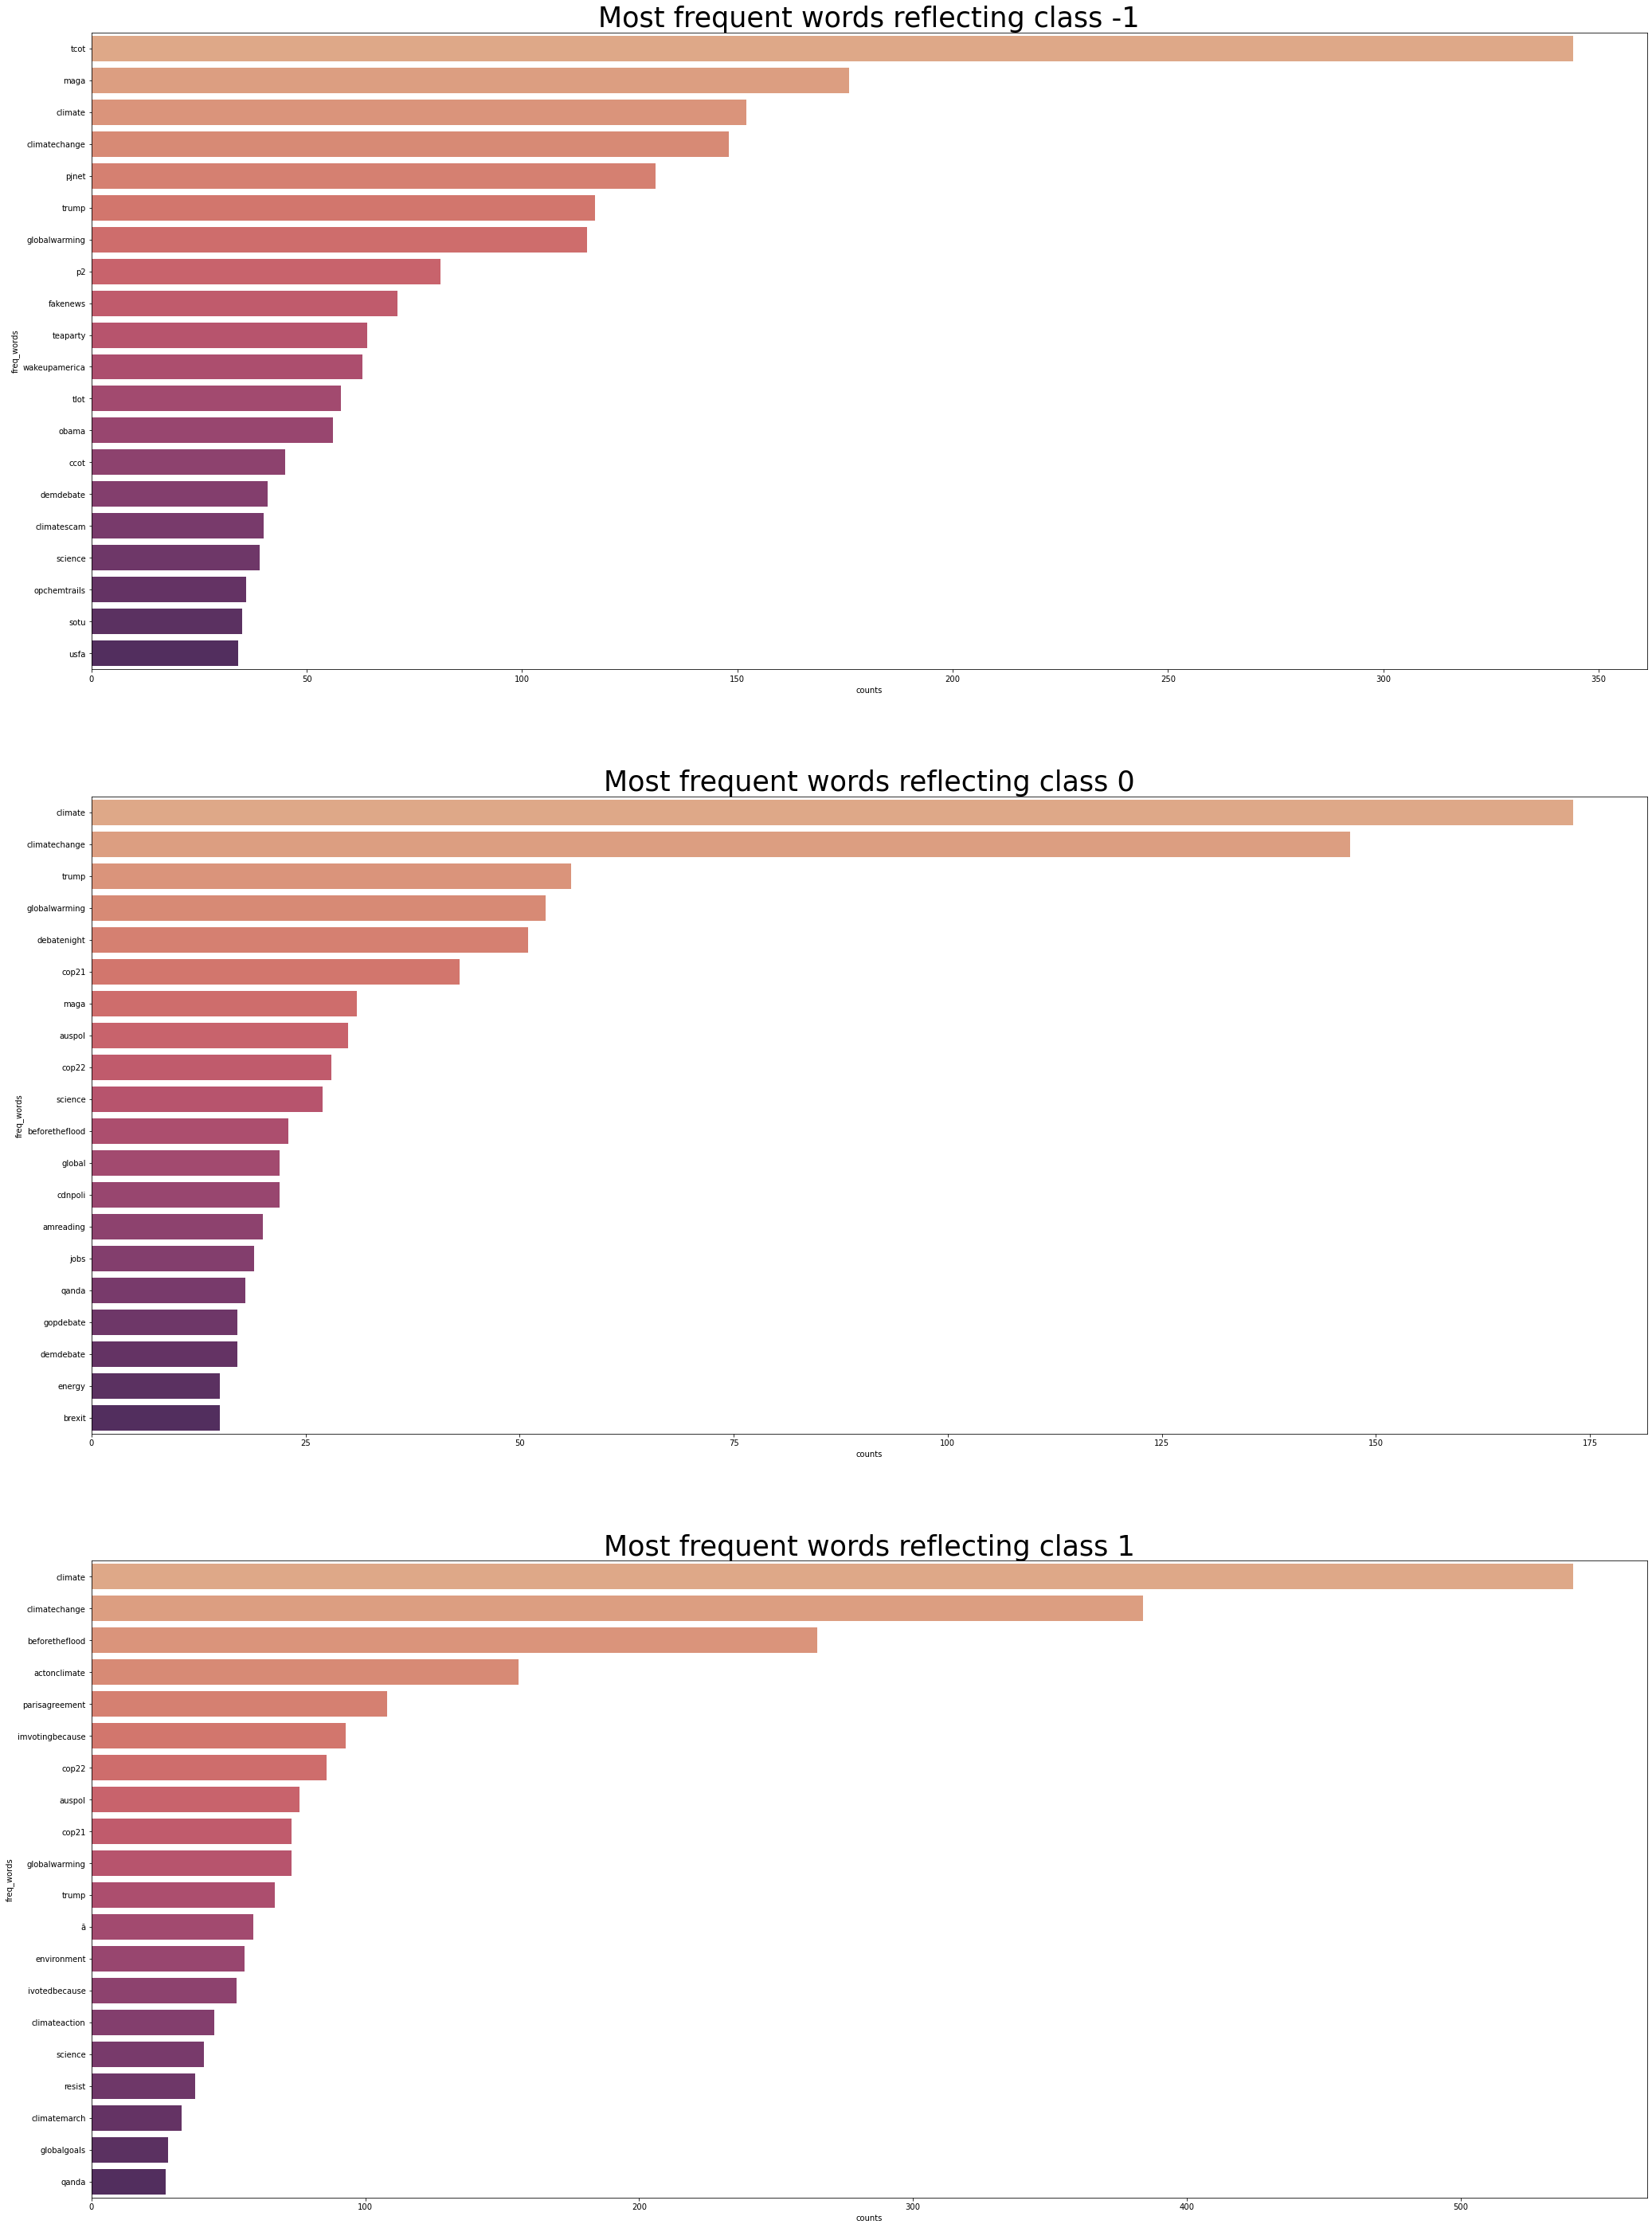

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(35, 50))
counter = 0

for sentiment, top in top20.items():
    sns.barplot(data=top, 
                y="freq_words", 
                x="counts", 
                ax=axes[counter],
               palette = 'flare')
    axes[counter].set_title(f"Most frequent words reflecting class {sentiment}", fontsize=35)
    counter += 1
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
frequency = {}

by_sentiment = df.groupby("sentiment")
for sentiment, group in df.groupby("sentiment"):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["message"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

-1               0                 1       
               word   freq     word   freq       word   freq
0           climate  13645  climate  13824    climate  19805
1            change  12681   change  13495     change  19254
2                rt  11884       rt  10384         rt  14675
3            global  11497    https   9954      https  13083
4           warming  11016   global   9626     global   4294
5             https  11007  warming   9306    warming   3916
6               amp   1280    trump   1436      trump   2298
7               man   1222      amp   1003    believe   1922
8              just   1210     like    972        amp   1696
9           science   1136     real    893       real   1304
10            obama   1129     just    852      doesn   1303
11  realdonaldtrump   1031     http    670      world   1153
12             hoax   1010  believe    653     people   1135
13             real    977      don    638      going   1078
14            trump    926    think    628       just    936
15           people    907       ðÿ    608        don    838
16             http    830   people    591      fight    834
17          weather    814     said    534       like    789
18            years    769      new    507  president    778
19    stevesgoddard    769      did    494        new    722
20             like    768    world    478       http    703
21             scam    764     know    468        die    677
22          believe    762     says    449    science    665
23             data    722  penguin    445       need    658
24              don    709    cause    442      think    596

Cleaning the tweets and tokenizing

In [28]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')


def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kysgattu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kysgattu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
df['final_text']= df.message.apply(clean_text).apply(clean_stopword).apply(tokenize)
df.final_text.head()

0    [tiniebeany, climate, change, interesting, hus...
1    [rt, natgeochannel, watch, beforetheflood, rig...
2    [fabulous, leonardo, dicaprios, film, climate,...
3    [rt, mickfanning, watched, amazing, documentar...
4    [unamshow, awache, kujinga, na, iko, global, w...
Name: final_text, dtype: object

Use Vader Analyser to analyse sentiment analysis

In [30]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(" ".join(df.final_text[0]))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kysgattu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.103, 'neu': 0.432, 'pos': 0.465, 'compound': 0.6908}

In [31]:
texts = ' '
for i in range(5):
    print(df.final_text[i])

['tiniebeany', 'climate', 'change', 'interesting', 'hustle', 'global', 'warming', 'planet', 'stopped', 'warming', 'yes', 'suv', 'boom']
['rt', 'natgeochannel', 'watch', 'beforetheflood', 'right', 'leodicaprio', 'travels', 'world', 'tackle', 'climate', 'change', 'httpstcolkdehjtnn', 'htt']
['fabulous', 'leonardo', 'dicaprios', 'film', 'climate', 'change', 'brilliant', 'watch', 'httpstcorvbrmxjw', 'via', 'youtube']
['rt', 'mickfanning', 'watched', 'amazing', 'documentary', 'leonardodicaprio', 'climate', 'change', 'think', 'httpstcoknstekim']
['unamshow', 'awache', 'kujinga', 'na', 'iko', 'global', 'warming', 'httpstcomhiflumx']


In [32]:
texts = [" ".join(df.final_text[i]) for i in range(len(df))]

print(df.message[0])
print(texts[0])
print(vader.polarity_scores(texts[0]), f'--> Class as per dataset: {df.sentiment[0]}', '\n')

print(df.message[1])
print(texts[1])
print(vader.polarity_scores(texts[1]), f'--> Class as per dataset: {df.sentiment[1]}', '\n')

print(df.message[10])
print(texts[10])
print(vader.polarity_scores(texts[10]), f'--> Class as per dataset: {df.sentiment[10]}', '\n')

print(df.message[50])
print(texts[50])
print(vader.polarity_scores(texts[50]), f'--> Class as per dataset: {df.sentiment[50]}', '\n')

print(df.message[100])
print(texts[100])
print(vader.polarity_scores(texts[100]), f'--> Class as per dataset: {df.sentiment[100]}', '\n')

print(df.message[500])
print(texts[500])
print(vader.polarity_scores(texts[500]), f'--> Class as per dataset: {df.sentiment[500]}', '\n')

print(df.message[1000])
print(texts[1000])
print(vader.polarity_scores(texts[1000]), f'--> Class as per dataset: {df.sentiment[1000]}', '\n')


@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
tiniebeany climate change interesting hustle global warming planet stopped warming yes suv boom
{'neg': 0.103, 'neu': 0.432, 'pos': 0.465, 'compound': 0.6908} --> Class as per dataset: -1 

RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦
rt natgeochannel watch beforetheflood right leodicaprio travels world tackle climate change httpstcolkdehjtnn htt
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Class as per dataset: 1 

Now's the time: we need a strong #FTT that works for those hardest hit by climate change and poverty!
nows time need strong ftt works hardest hit climate change poverty
{'neg': 0.212, 'neu': 0.577, 'pos': 0.212, 'compound': 0.0} --> Class as per dataset: 1 

@MikeBloomberg @LeoDiCaprio why aren't you vegan? meat industry cont

>We observe that the scores and the actual classification are not exactly matching much

Preparing Data for rxtracting Buzzwords using wordcloud.

In [33]:
pro = df[df.sentiment == 1].message.apply(clean_text).apply(clean_stopword).apply(tokenize)
pro = [" ".join(pro.values[i]) for i in range(len(pro))]
pro = [" ".join(pro)][0]

anti = df[df.sentiment == -1].message.apply(clean_text).apply(clean_stopword).apply(tokenize)
anti = [" ".join(anti.values[i]) for i in range(len(anti))]
anti = [" ".join(anti)][0]

neutral = df[df.sentiment == 0].message.apply(clean_text).apply(clean_stopword).apply(tokenize)
neutral = [" ".join(neutral.values[i]) for i in range(len(neutral))]
neutral = [" ".join(neutral)][0]

print(len(pro), len(anti), len(neutral))

2190971 2112592 1900172


Plot Wordclouds of Buzzwords

In [34]:
from wordcloud import WordCloud

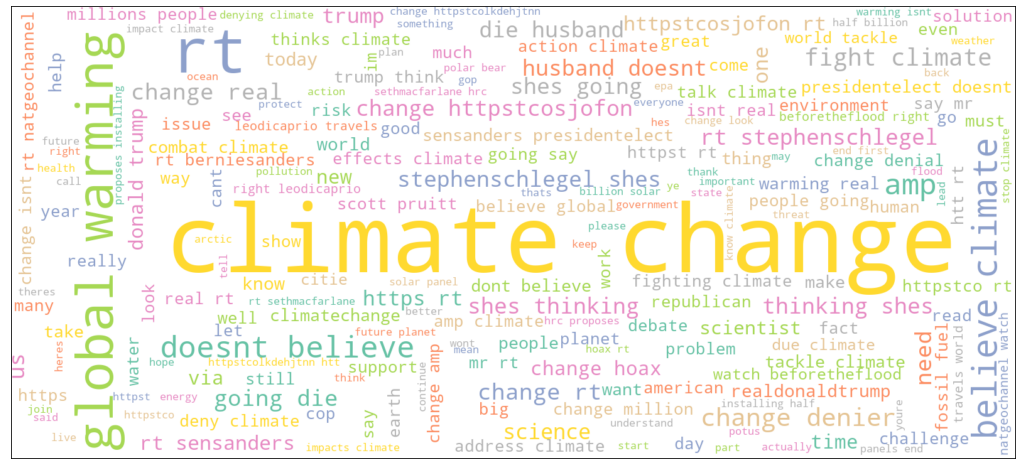

In [35]:
plt.figure(figsize=(18,15))
wc_pro = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(pro)

plt.imshow(wc_pro,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

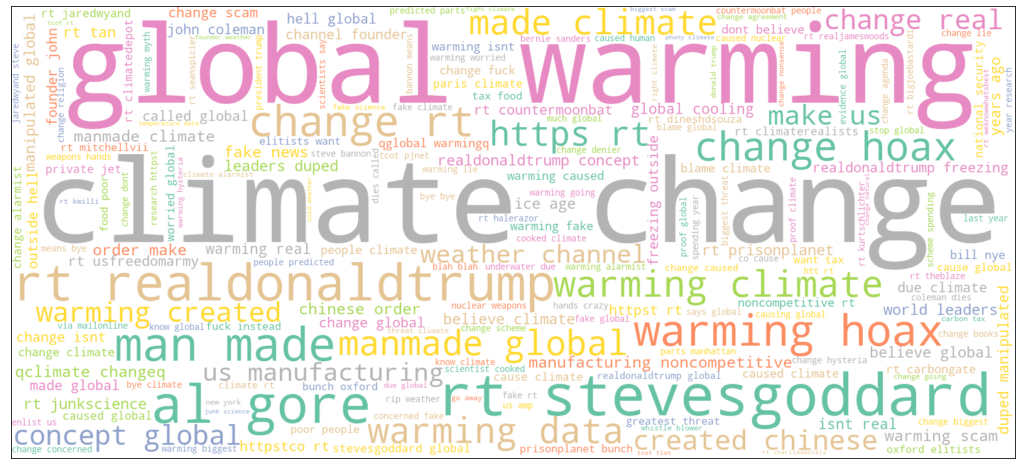

In [36]:
plt.figure(figsize=(18,15))
wc_anti = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(anti)

plt.imshow(wc_anti,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

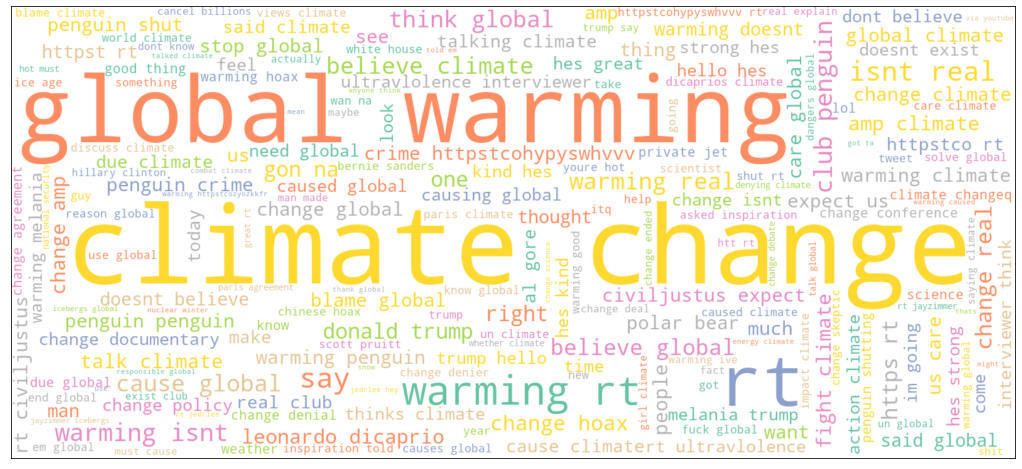

In [37]:
plt.figure(figsize=(18,15))
wc_neutral = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(neutral)

plt.imshow(wc_neutral,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC as SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

In [39]:
df2.head()

,message,tweetid,sentiment
0,@tiniebeany climate change is an interesting h...,792927353886371840,-1
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,1
2,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,1
3,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,1
4,Unamshow awache kujinga na iko global warming ...,793125429418815489,0


In [40]:
X = df2["message"]
y = df2["sentiment"]
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.2, random_state=42)


We use TFIDf Vectorizer to score the frequency of words. And these scores highlight the words that influence the sentiment. We train the models using these TFIDF Scores

In [41]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train_ml)


<55108x55439 sparse matrix of type '<class 'numpy.float64'>'
	with 956344 stored elements in Compressed Sparse Row format>

Train Logistic Regression Model

In [42]:
log_model = LGR(class_weight="balanced", max_iter=1000)
log_model.fit(tfidf.transform(X_train_ml), y_train_ml)
log_preds = log_model.predict(tfidf.transform(X_test_ml))


We train multiple models with different continuous values of nearest neighbors.
We find the model which has optimal train and test scores (we choose optimal number of neighbors that doesnt overfit the model nor lose the data points which miss features)

In [43]:
#k_values = []
#train_scores = []
#test_scores = []
#for k in range (1,31):
#    temp_knn_k = KNN(n_neighbors=k)
#    temp_knn_k.fit(tfidf.transform(X_train_ml), y_train_ml)
#    y_pred_temp_knn = temp_knn_k.predict(tfidf.transform(X_test_ml))
#    train_score=temp_knn_k.score(tfidf.transform(X_train_ml),y_train_ml)
#    test_score=temp_knn_k.score(tfidf.transform(X_test_ml),y_test_ml)
#    train_scores.append(train_score)
#    test_scores.append(test_score)
#    k_values.append(k)
#print(k_values)
#print(train_scores)
#print(test_scores)

#plt.plot(k_values,train_scores, color='red',label='Training Score')
#plt.plot(k_values,test_scores, color='blue',label='Testing Score')

#plt.legend(loc="best")
#plt.xlabel('K values')
#plt.ylabel('Scores')

>We find model trained with optimally 15 neighbors is a good choice

In [44]:
#K-Nearest Neighbour with euclidean distance
knn_model = KNN(n_neighbors=15, weights = 'distance')
knn_model.fit(tfidf.transform(X_train_ml), y_train_ml)
knn_preds = knn_model.predict(tfidf.transform(X_test_ml))


We trained a Naive Bayes classifier

In [45]:
#Multinomial Naive Bayes
mnb_model = MNB()
mnb_model.fit(tfidf.transform(X_train_ml), y_train_ml)
mnb_preds = mnb_model.predict(tfidf.transform(X_test_ml))


We also trained a complement Naive Bayes before Balancing the classes, but once we have done that complement classifier is almost same as multinomial naive bayes

In [46]:
#Complement Naive Bayes
#cnb_model = CNB()
#cnb_model.fit(tfidf.transform(X_train_ml), y_train_ml)
#cnb_preds = cnb_model.predict(tfidf.transform(X_test_ml))


We trained multiple models using different criteria of Random Forest and different methhods of choosing maximum features and calculate train and test scores of each model. Then based on these scores we finalize the best possible way to train the Random Forest Model.

In [47]:
#crit = ['gini', 'entropy']
#max_features = ['auto' , 'sqrt' , 'log2']

In [48]:
#print(' Criterion ' + ' max_features '+' Train Score ' + ' Test Score')
#for i in crit:
#    for j in max_features:
#        temp_rf = RFC(n_estimators = 100, criterion = i, max_features = j)
#        temp_rf.fit(tfidf.transform(X_train_ml), y_train_ml)
#        temp_y_pred = temp_rf.predict(tfidf.transform(X_test_ml))
#        train_score=temp_rf.score(tfidf.transform(X_train_ml), y_train_ml)
#        test_score=temp_rf.score(tfidf.transform(X_test_ml),y_test_ml)
#        print(i,j,train_score,test_score)

In [49]:
#Random Forest
rfc_model= RFC(n_estimators = 100, criterion = 'gini', max_features = 'log2')
rfc_model.fit(tfidf.transform(X_train_ml), y_train_ml)
rfc_preds = rfc_model.predict(tfidf.transform(X_test_ml))


# LSTM

In [50]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional,Embedding, Dropout, Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping


In [51]:
from keras.metrics import Precision, Recall


In [52]:
from sklearn.model_selection import train_test_split


We Tokenize the tweets and convert them into set of integers and normalize these and pad them together into sets of same size

In [53]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['final_text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df['final_text'])
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
 ['tiniebeany', 'climate', 'change', 'interesting', 'hustle', 'global', 'warming', 'planet', 'stopped', 'warming', 'yes', 'suv', 'boom'] 

After Tokenization & Padding 
 [   1    2  482    4    5   83  717    5  134 2826 2579    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


Split the Data into Train, Validation and Test sets 

In [54]:
y = pd.get_dummies(df.sentiment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

print('Train:         ', X_train.shape, y_train.shape)
print('Validation Set:', X_valid.shape, y_valid.shape)
print('Test Set:      ', X_test.shape, y_test.shape)

Train:          (38575, 100) (38575, 3)
Validation Set: (16533, 100) (16533, 3)
Test Set:       (13778, 100) (13778, 3)


In [55]:
X_train

array([[3624,  901,   12, ...,    0,    0,    0],
       [2443, 1061, 1008, ...,    0,    0,    0],
       [   3, 3129,  115, ...,    0,    0,    0],
       ...,
       [   1,    2,   34, ...,    0,    0,    0],
       [ 546,  360,    1, ...,    0,    0,    0],
       [4217,   67,  306, ...,    0,    0,    0]], dtype=int32)

Define a Keras Sequential model and add Embedding Layer, Convolutional Layer, Maxpooling Layer and a Bidirectional LSTM to train the model, we also add a Dropout Layer to prevent overfitting 

In [56]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
#plot_model(model, show_shapes = True)


Metal device set to: Apple M1 Pro


2022-04-24 21:42:09.263094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 21:42:09.263180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


> plot function is not working with Mac Silicon System so adding the image of network architecture in markdown

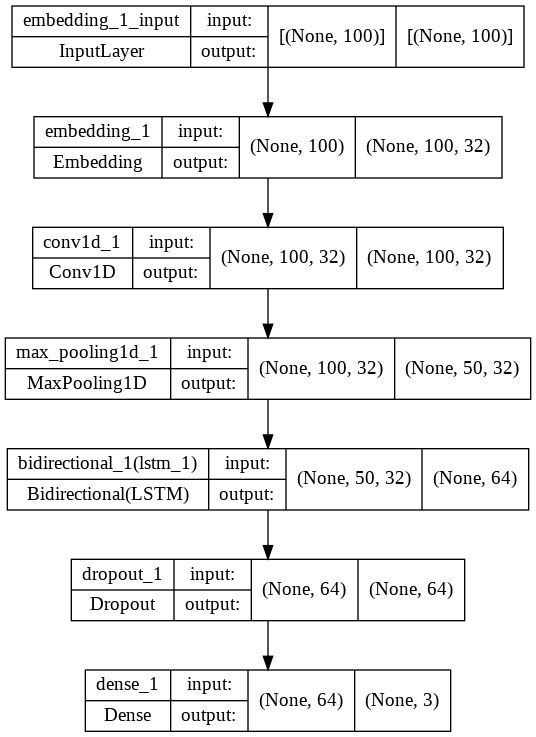

We compile the model with adam optimizer with a categorical_crossentropy loss function also reporting few metrics

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

We define an Early Stoppping by measuring validation loss as monitor and fit the model for a maximum of 50 epochs

In [58]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    callbacks = [es])

Epoch 1/50


2022-04-24 21:42:09.724226: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 21:42:11.134214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:42:11.410654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:42:11.420888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:42:11.591858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:42:11.606520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - ETA: 0s - loss: 0.7110 - accuracy: 0.6832 - precision: 0.7838 - recall: 0.5562

2022-04-24 21:42:45.575324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:42:45.689973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:42:45.697299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - 41s 64ms/step - loss: 0.7110 - accuracy: 0.6832 - precision: 0.7838 - recall: 0.5562 - val_loss: 0.5270 - val_accuracy: 0.7836 - val_precision: 0.8107 - val_recall: 0.7508
Epoch 2/50
603/603 [==============================] - 38s 63ms/step - loss: 0.4372 - accuracy: 0.8341 - precision: 0.8538 - recall: 0.8117 - val_loss: 0.4509 - val_accuracy: 0.8265 - val_precision: 0.8432 - val_recall: 0.8092
Epoch 3/50
603/603 [==============================] - 38s 63ms/step - loss: 0.3299 - accuracy: 0.8791 - precision: 0.8906 - recall: 0.8662 - val_loss: 0.4026 - val_accuracy: 0.8542 - val_precision: 0.8662 - val_recall: 0.8390
Epoch 4/50
603/603 [==============================] - 38s 63ms/step - loss: 0.2395 - accuracy: 0.9152 - precision: 0.9225 - recall: 0.9072 - val_loss: 0.4093 - val_accuracy: 0.8619 - val_precision: 0.8694 - val_recall: 0.8532
Epoch 5/50
603/603 [==============================] - 38s 63ms/step - loss: 0.1656 - accuracy: 0.9441 - pre

Plot graphs of loss and accuracies across the epochs

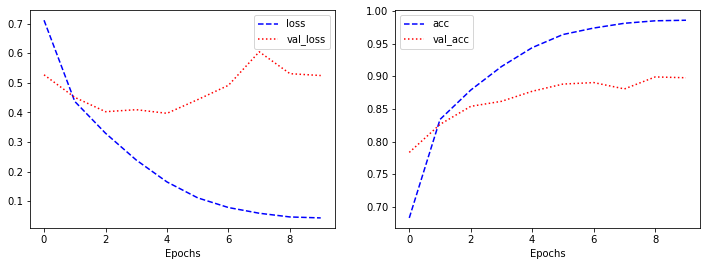

In [59]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()


Get the evaluation metrics of saved model

In [60]:
lstm_loss, lstm_accuracy, lstm_precision, lstm_recall = model.evaluate(X_test, y_test, verbose=0)
lstm_f1_score = 2 * (lstm_precision * lstm_recall) / (lstm_precision + lstm_recall)
# Print metrics


In [61]:
print('Accuracy  : {:.4f}'.format(lstm_accuracy))
print('Precision  : {:.4f}'.format(lstm_precision))
print('Recall  : {:.4f}'.format(lstm_recall))
print('F1-Score  : {:.4f}'.format(lstm_f1_score))

Accuracy  : 0.9022
Precision  : 0.9033
Recall  : 0.9007
F1-Score  : 0.9020


Predict the values of test set

In [62]:
y_pred_lstm = model.predict(X_test)


2022-04-24 21:47:50.335458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:47:50.407710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 21:47:50.415129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [63]:
from sklearn.metrics import *


Define Sentiment classes for Confusion matrix and Classification Reports

In [64]:
sentiment_classes = sorted(['-1', '1', '0'])


Create Classification Reports for all above Trained models

In [65]:
cr_lstm = classification_report(np.argmax(np.array(y_test),axis=1), 
                                np.argmax(y_pred_lstm, axis=1), 
                                target_names = sentiment_classes)

In [66]:
cr_log = classification_report(y_test_ml, log_preds)
cr_knn = classification_report(y_test_ml, knn_preds)
cr_mnb = classification_report(y_test_ml, mnb_preds)
cr_rfc = classification_report(y_test_ml, rfc_preds)


Create Confusion Matrices for all above trained models

In [67]:
cm_lstm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred_lstm, axis=1))


In [68]:
cm_log = confusion_matrix(y_test_ml, log_preds)
cm_knn = confusion_matrix(y_test_ml, knn_preds)
cm_mnb = confusion_matrix(y_test_ml, mnb_preds)
cm_rfc = confusion_matrix(y_test_ml, rfc_preds)


Plot Heatmaps for Confusion Matrices

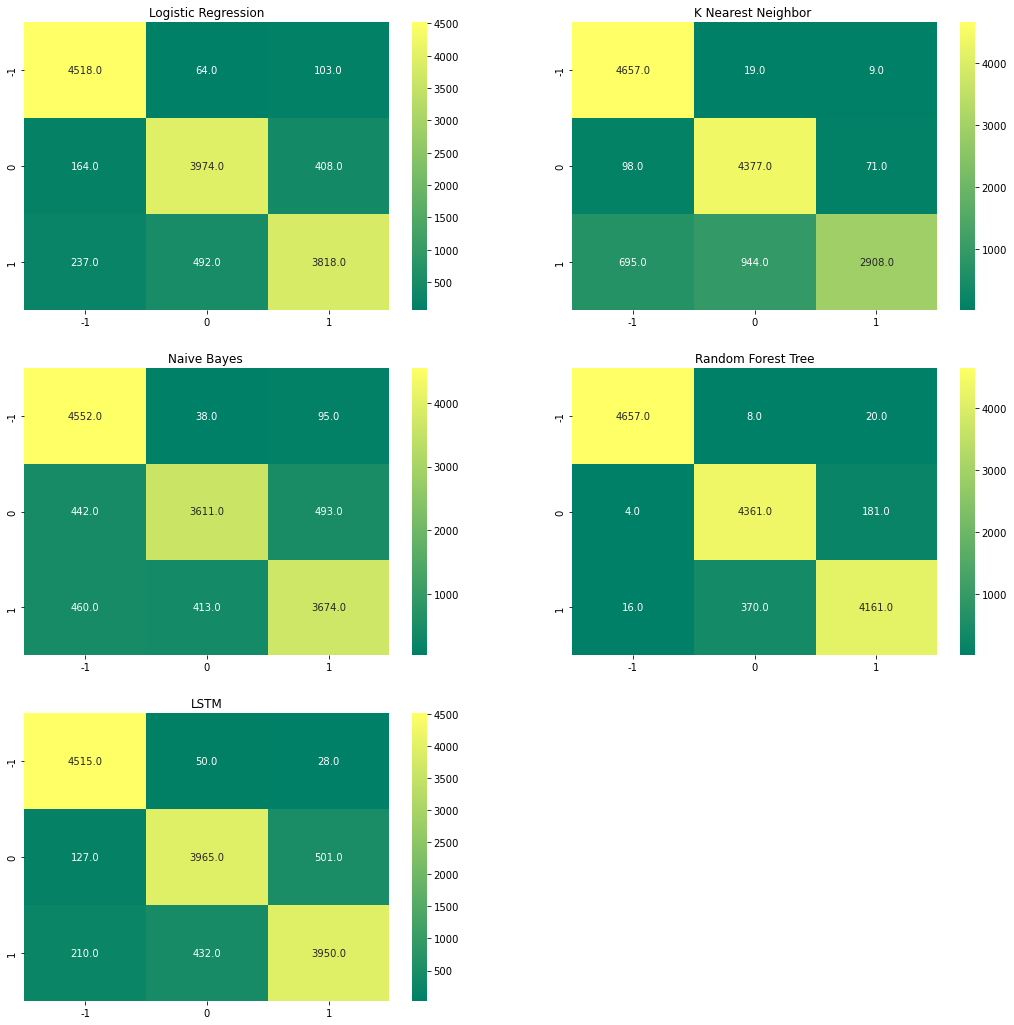

In [69]:
fig=plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
sns.heatmap(cm_log,
            annot=True, 
            fmt=".1f", 
            cmap='summer', 
            xticklabels = sentiment_classes, 
            yticklabels = sentiment_classes)
plt.title('Logistic Regression')

plt.subplot(3,2,2)
sns.heatmap(cm_knn,
            annot=True, 
            fmt=".1f", 
            cmap='summer', 
            xticklabels = sentiment_classes, 
            yticklabels = sentiment_classes)
plt.title('K Nearest Neighbor ')

plt.subplot(3,2,3)
sns.heatmap(cm_mnb,
            annot=True, 
            fmt=".1f", 
            cmap='summer', 
            xticklabels = sentiment_classes, 
            yticklabels = sentiment_classes)
plt.title('Naive Bayes ')

plt.subplot(3,2,4)
sns.heatmap(cm_rfc,
            annot=True, 
            fmt=".1f", 
            cmap='summer', 
            xticklabels = sentiment_classes, 
            yticklabels = sentiment_classes)
plt.title('Random Forest Tree')

plt.subplot(3,2,5)
sns.heatmap(cm_lstm,
            annot=True, 
            fmt=".1f", 
            cmap='summer', 
            xticklabels = sentiment_classes, 
            yticklabels = sentiment_classes)
plt.title('LSTM')

plt.show()


Print Classification Reports showing Precision, Accuracy, F1-Score and Suppor of all the classes for all trained models

In [70]:
print("*"*20+'Logistic Regression'+"*"*20)
print(cr_log)

print("*"*20+'K Nearest Neighbor'+"*"*20)
print(cr_knn)

print("*"*20+'Naive Bayes'+"*"*20)
print(cr_mnb)

print("*"*20+'Random Forest'+"*"*20)
print(cr_rfc)

print("*"*20+'LSTM'+"*"*20)
print(cr_lstm)


********************Logistic Regression********************
              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      4685
           0       0.88      0.87      0.88      4546
           1       0.88      0.84      0.86      4547

    accuracy                           0.89     13778
   macro avg       0.89      0.89      0.89     13778
weighted avg       0.89      0.89      0.89     13778

********************K Nearest Neighbor********************
              precision    recall  f1-score   support

          -1       0.85      0.99      0.92      4685
           0       0.82      0.96      0.89      4546
           1       0.97      0.64      0.77      4547

    accuracy                           0.87     13778
   macro avg       0.88      0.87      0.86     13778
weighted avg       0.88      0.87      0.86     13778

********************Naive Bayes********************
              precision    recall  f1-score   support

          -1